In [1]:
import os
import re

from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [5]:
과학기술 = '/home/sjt/space/github/references/과학기술'
인문사회과학 = '/home/sjt/space/github/references/인문사회과학'

list_reference = []

for path, subdirs, files in os.walk(과학기술):
    for f in files:
        list_reference.append([path.split('/')[-1], f, path])

for path, subdirs, files in os.walk(인문사회과학):
    for f in files:
        list_reference.append([path.split('/')[-1], f, path])
        
df_reference = pd.DataFrame(list_reference, columns=['분류','내용','경로'])
df_reference


,분류,내용,경로
0,프로그래밍,오늘코딩.md,/home/sjt/space/github/references/과학기술/프로그래밍
1,프로그래밍,파이썬으로_배우는_웹크롤러.md,/home/sjt/space/github/references/과학기술/프로그래밍
2,프로그래밍,github.md,/home/sjt/space/github/references/과학기술/프로그래밍
3,프로그래밍,윤인성.md,/home/sjt/space/github/references/과학기술/프로그래밍
4,프로그래밍,생활코딩.md,/home/sjt/space/github/references/과학기술/프로그래밍
...,...,...,...
66,철학,하버드_마이클샌델_정의란무엇인가.md,/home/sjt/space/github/references/인문사회과학/철학
67,철학,README.md,/home/sjt/space/github/references/인문사회과학/철학
68,영어와문학,OPIc.md,/home/sjt/space/github/references/인문사회과학/영어와문학
69,영어와문학,TOEIC.md,/home/sjt/space/github/references/인문사회과학/영어와문학


In [36]:
df_reference[['분류','내용']].groupby('분류').count()

,내용
분류,
ai,1
경영학,1
경제학,3
데이터분석,14
물리화학,7
생명과학,9
수학_통계,9
알고리즘,6
언어학,1


In [39]:
df_reference[['분류','내용']].groupby('분류').count()['내용']

분류
ai        1
경영학       1
경제학       3
데이터분석    14
물리화학      7
생명과학      9
수학_통계     9
알고리즘      6
언어학       1
영어와문학     2
인문학       1
인지과학      1
정보학       1
철학        3
컴퓨터공학     4
프로그래밍     8
Name: 내용, dtype: int64

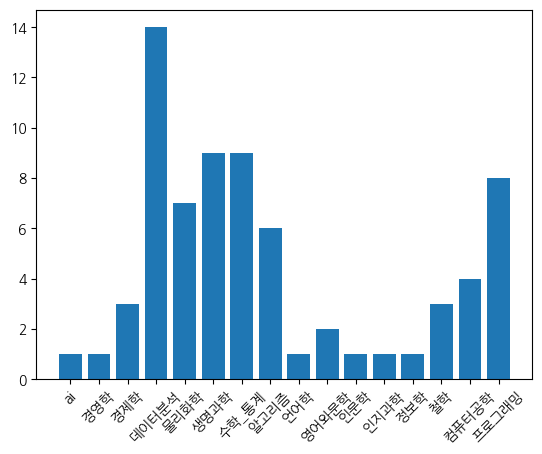

In [46]:
fig, ax = plt.subplots()

ax.bar(
    df_reference[['분류','내용']].groupby('분류').count().index,
    df_reference[['분류','내용']].groupby('분류').count()['내용']
)

plt.xticks(rotation=45);